In [1]:
import jax.numpy as jnp
from jax import config, random, vmap
config.update("jax_enable_x64", True)

import requests
from urllib.parse import urlencode

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
! git init .
! git remote add origin https://github.com/VLSF/augmentation
! git pull origin main

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 34 (delta 11), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (34/34), 3.38 MiB | 5.68 MiB/s, done.
From https://github.com/VLSF/augmentation
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [3]:
from augmentation import D1

# Elliptic

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/ys7xC3qfLa4CMg'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('elliptic_data.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/elliptic_data.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((3000, 2, 100), (3000, 1, 100))

In [5]:
key = random.PRNGKey(11)
features_, targets_ = D1.augment_dataset(features, targets, key, D1.eliptic_augment_sample, 1)
features_.shape, targets_.shape

((6000, 2, 100), (6000, 1, 100))

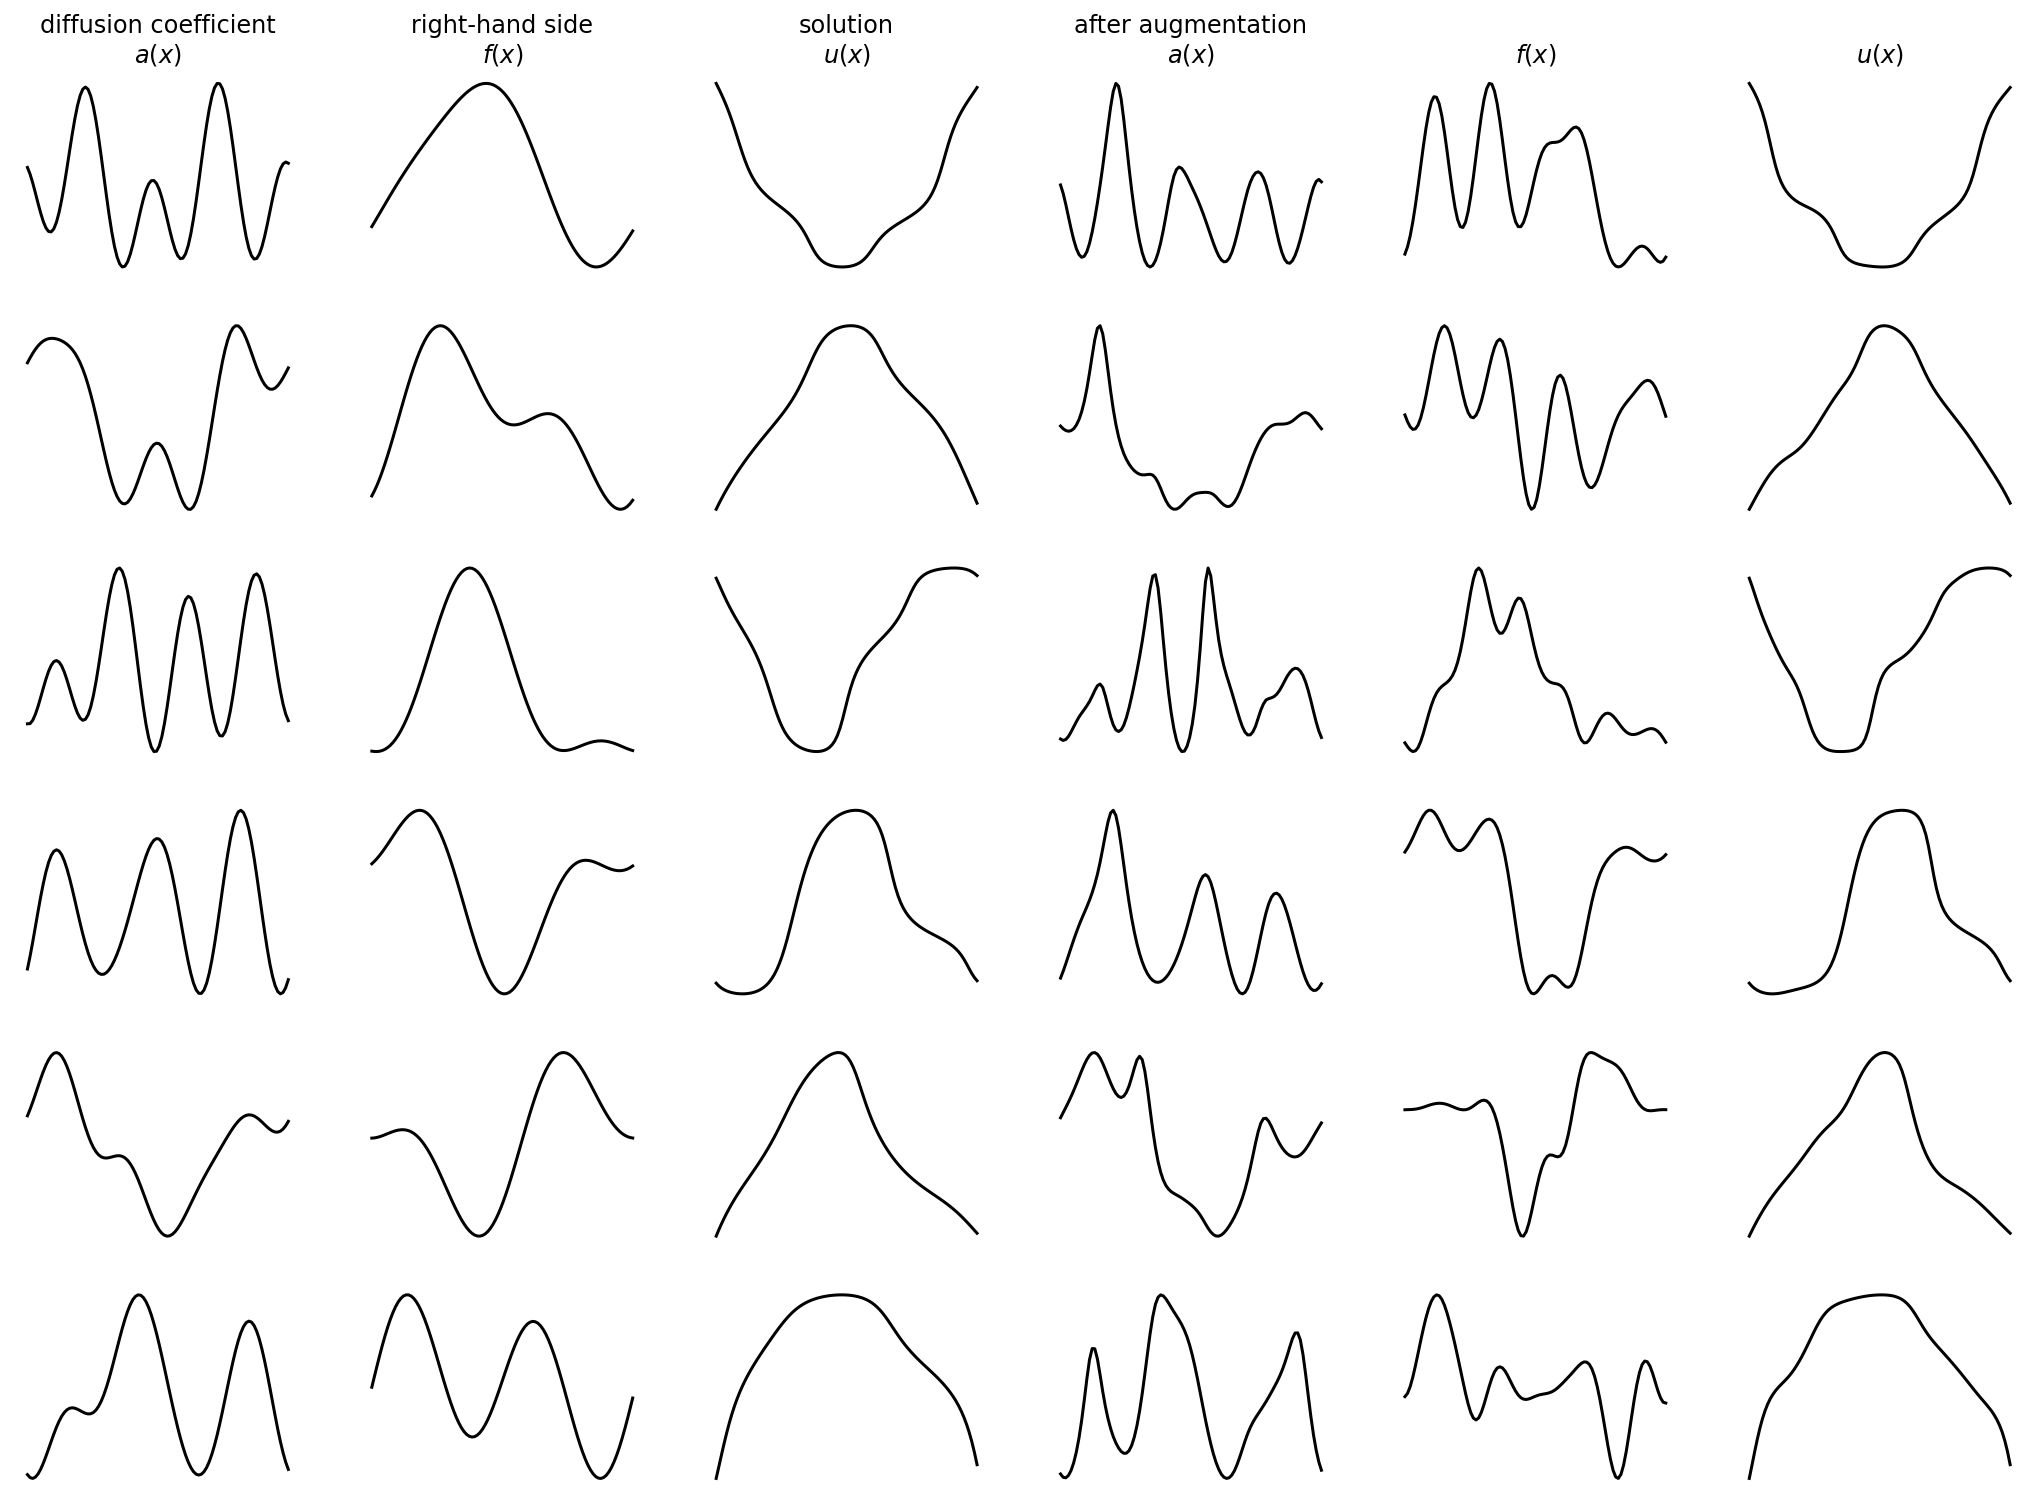

In [6]:
fig, ax = plt.subplots(6, 6, figsize=(18, 13))

x = jnp.linspace(0, 1, 100)

sample = 13
for i in range(6):
    ax[i, 0].plot(x, features_[sample + i, 0], color="black")
    ax[i, 1].plot(x, features_[sample + i, 1], color="black")
    ax[i, 2].plot(x, targets_[sample + i, 1], color="black")

    ax[i, 3].plot(x, features_[3000 + sample + i, 0], color="black")
    ax[i, 4].plot(x, features_[3000 + sample + i, 1], color="black")
    ax[i, 5].plot(x, targets_[3000 + sample + i, 1], color="black")

ax[0, 0].set_title("diffusion coefficient\n$a(x)$")
ax[0, 1].set_title("right-hand side\n$f(x)$")
ax[0, 2].set_title("solution\n$u(x)$")

ax[0, 3].set_title("after augmentation\n$a(x)$")
ax[0, 4].set_title("$f(x)$")
ax[0, 5].set_title("$u(x)$")

for a in ax.reshape(-1, ):
    a.axis("off")

# Convection-diffusion

In [7]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/en1yg7s20fcEbg'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('convection_diffusion_data.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/convection_diffusion_data.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((3000, 3, 100), (3000, 1, 100))

In [8]:
key = random.PRNGKey(11)
features_, targets_ = D1.augment_dataset(features, targets, key, D1.convection_diffusion_augment_sample, 1)
features_.shape, targets_.shape

((6000, 3, 100), (6000, 1, 100))

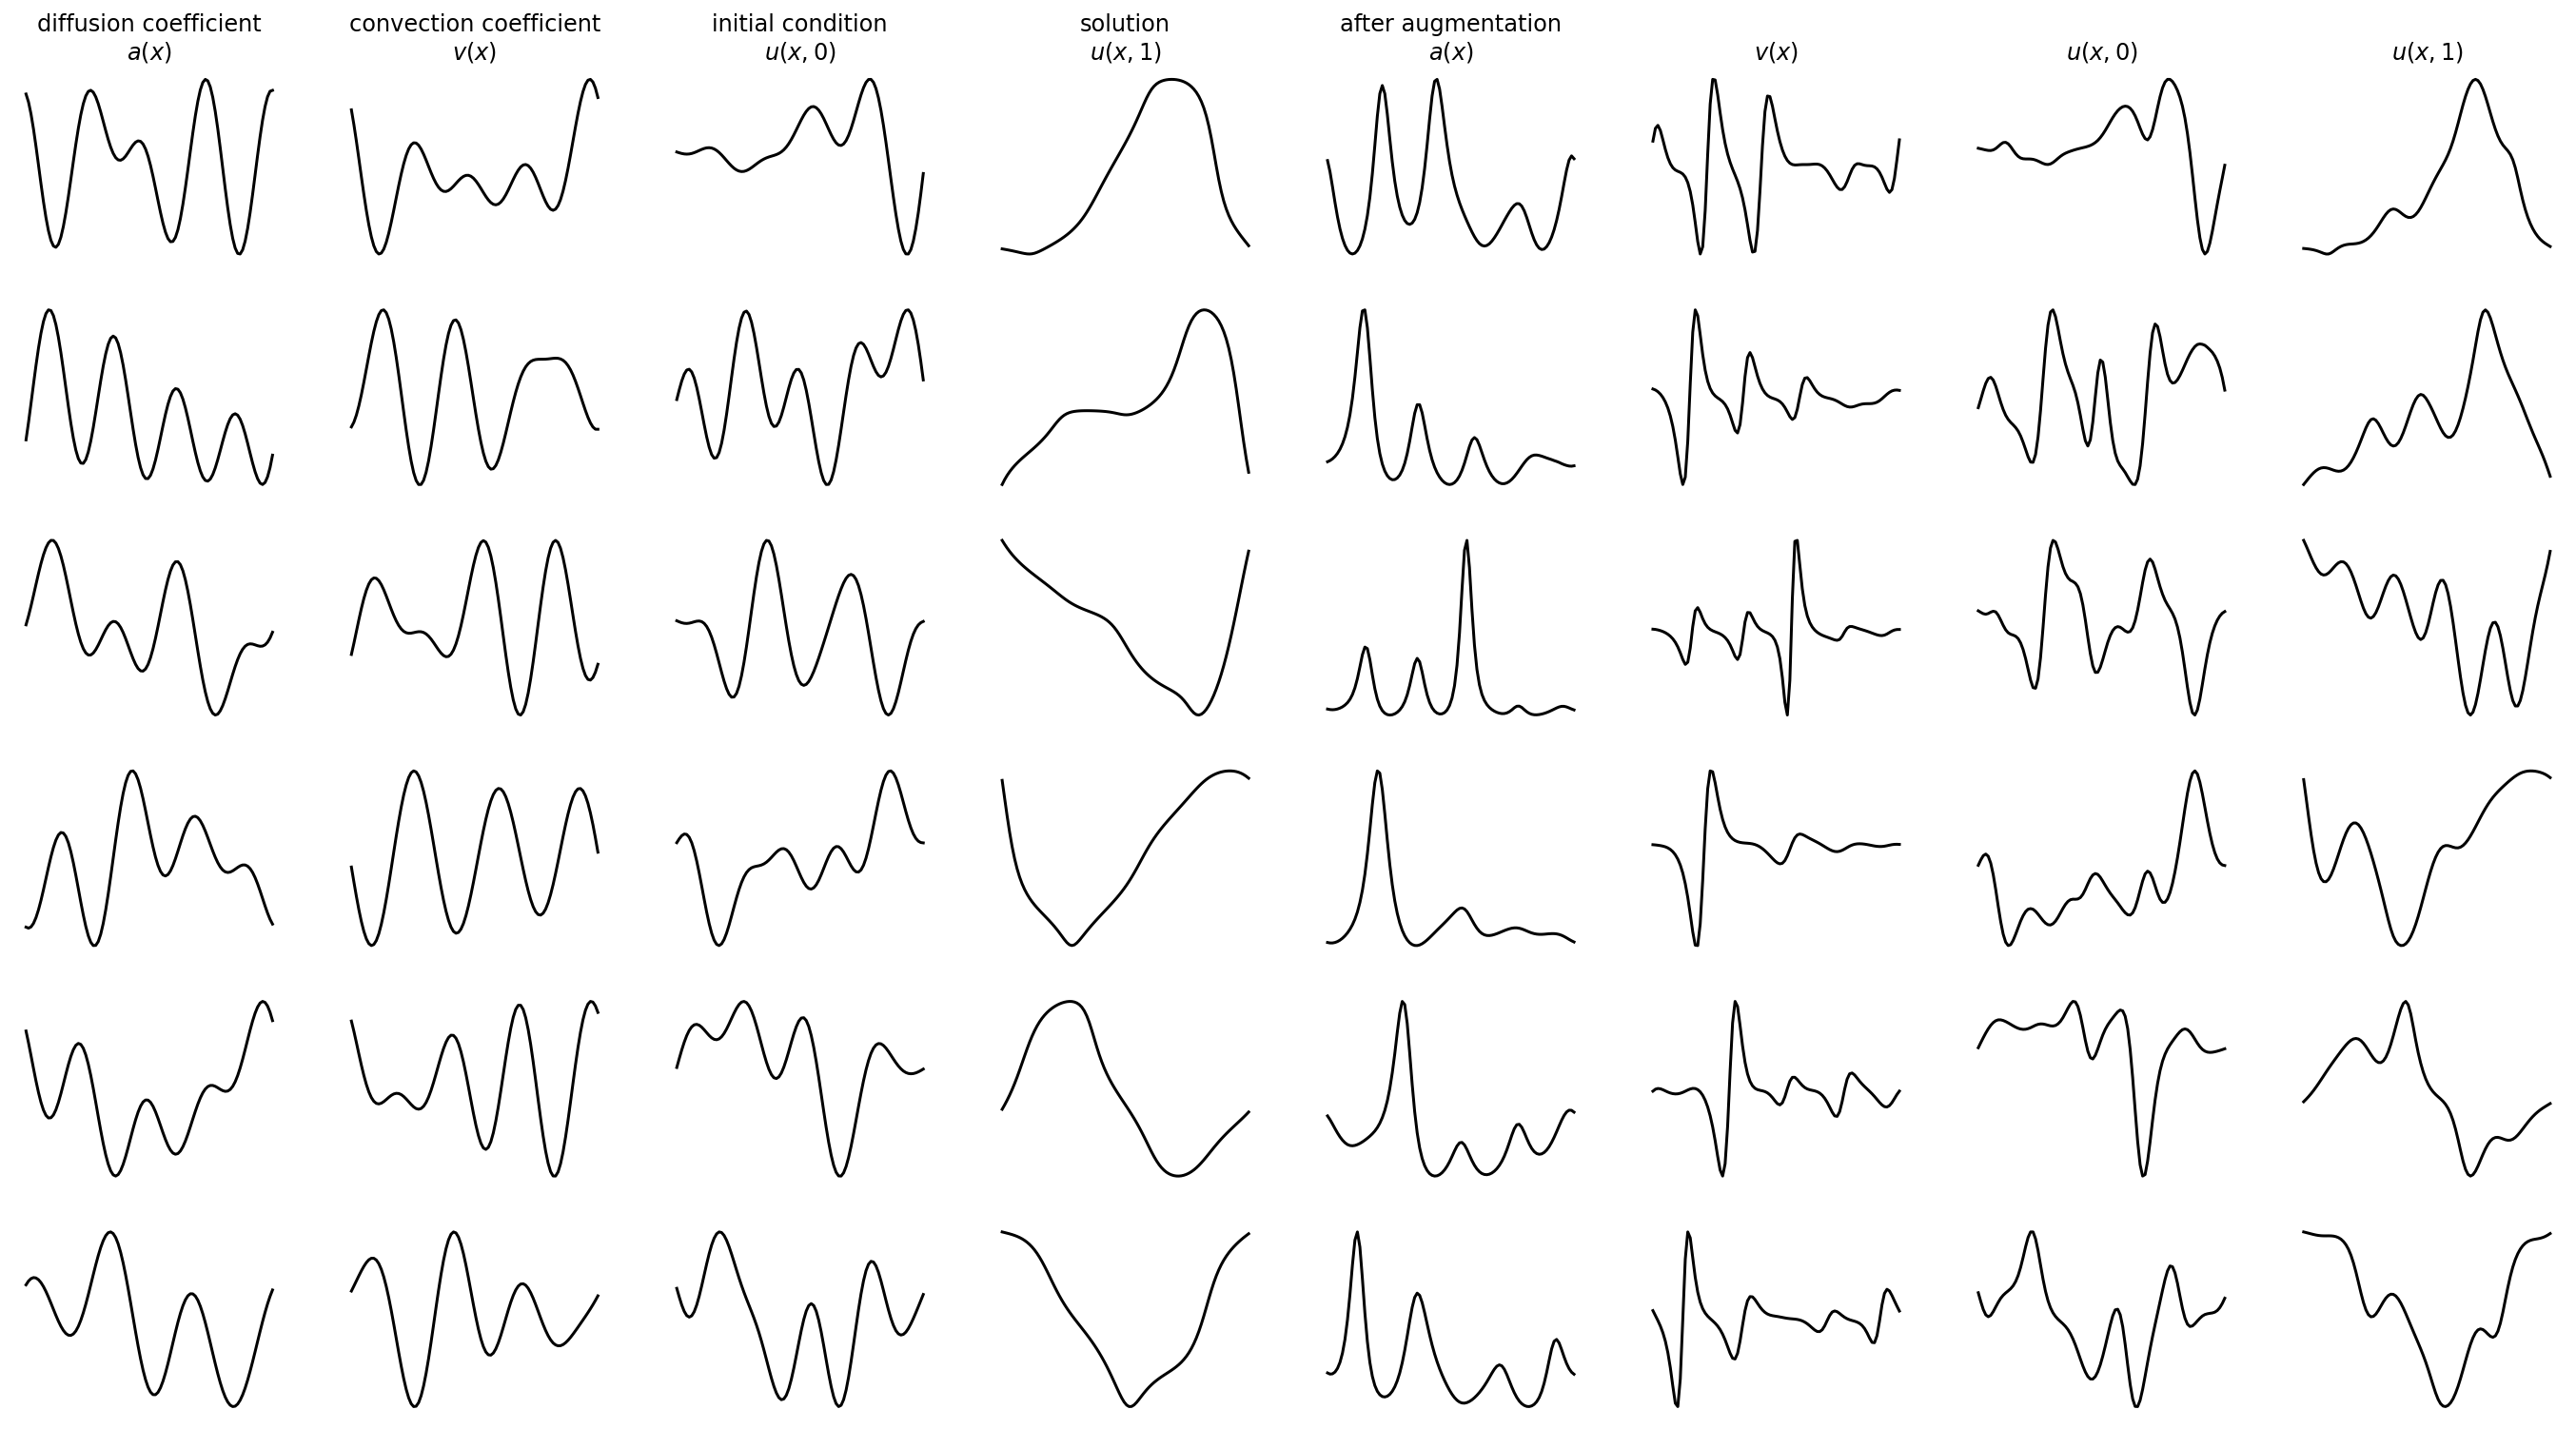

In [9]:
fig, ax = plt.subplots(6, 8, figsize=(24, 13))

x = jnp.linspace(0, 1, 100)

sample = 13
for i in range(6):
    ax[i, 0].plot(x, features_[sample + i, 0], color="black")
    ax[i, 1].plot(x, features_[sample + i, 1], color="black")
    ax[i, 2].plot(x, features_[sample + i, 2], color="black")
    ax[i, 3].plot(x, targets_[sample + i, 0], color="black")

    ax[i, 4].plot(x, features_[3000 + sample + i, 0], color="black")
    ax[i, 5].plot(x, features_[3000 + sample + i, 1], color="black")
    ax[i, 6].plot(x, features_[3000 + sample + i, 2], color="black")
    ax[i, 7].plot(x, targets_[3000 + sample + i, 0], color="black")

ax[0, 0].set_title("diffusion coefficient\n$a(x)$")
ax[0, 1].set_title("convection coefficient\n$v(x)$")
ax[0, 2].set_title("initial condition\n$u(x, 0)$")
ax[0, 3].set_title("solution\n$u(x, 1)$")

ax[0, 4].set_title("after augmentation\n$a(x)$")
ax[0, 5].set_title("$v(x)$")
ax[0, 6].set_title("$u(x, 0)$")
ax[0, 7].set_title("$u(x, 1)$")

for a in ax.reshape(-1, ):
    a.axis("off")

# Wave (10)

In [10]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/ugEA7jx9j_MQbA'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('wave_data_10.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/wave_data_10.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((3000, 4, 100), (3000, 1, 100))

In [11]:
key = random.PRNGKey(11)
features_, targets_ = D1.augment_dataset(features, targets, key, D1.wave_augment_sample, 1)
features_.shape, targets_.shape

((6000, 4, 100), (6000, 1, 100))

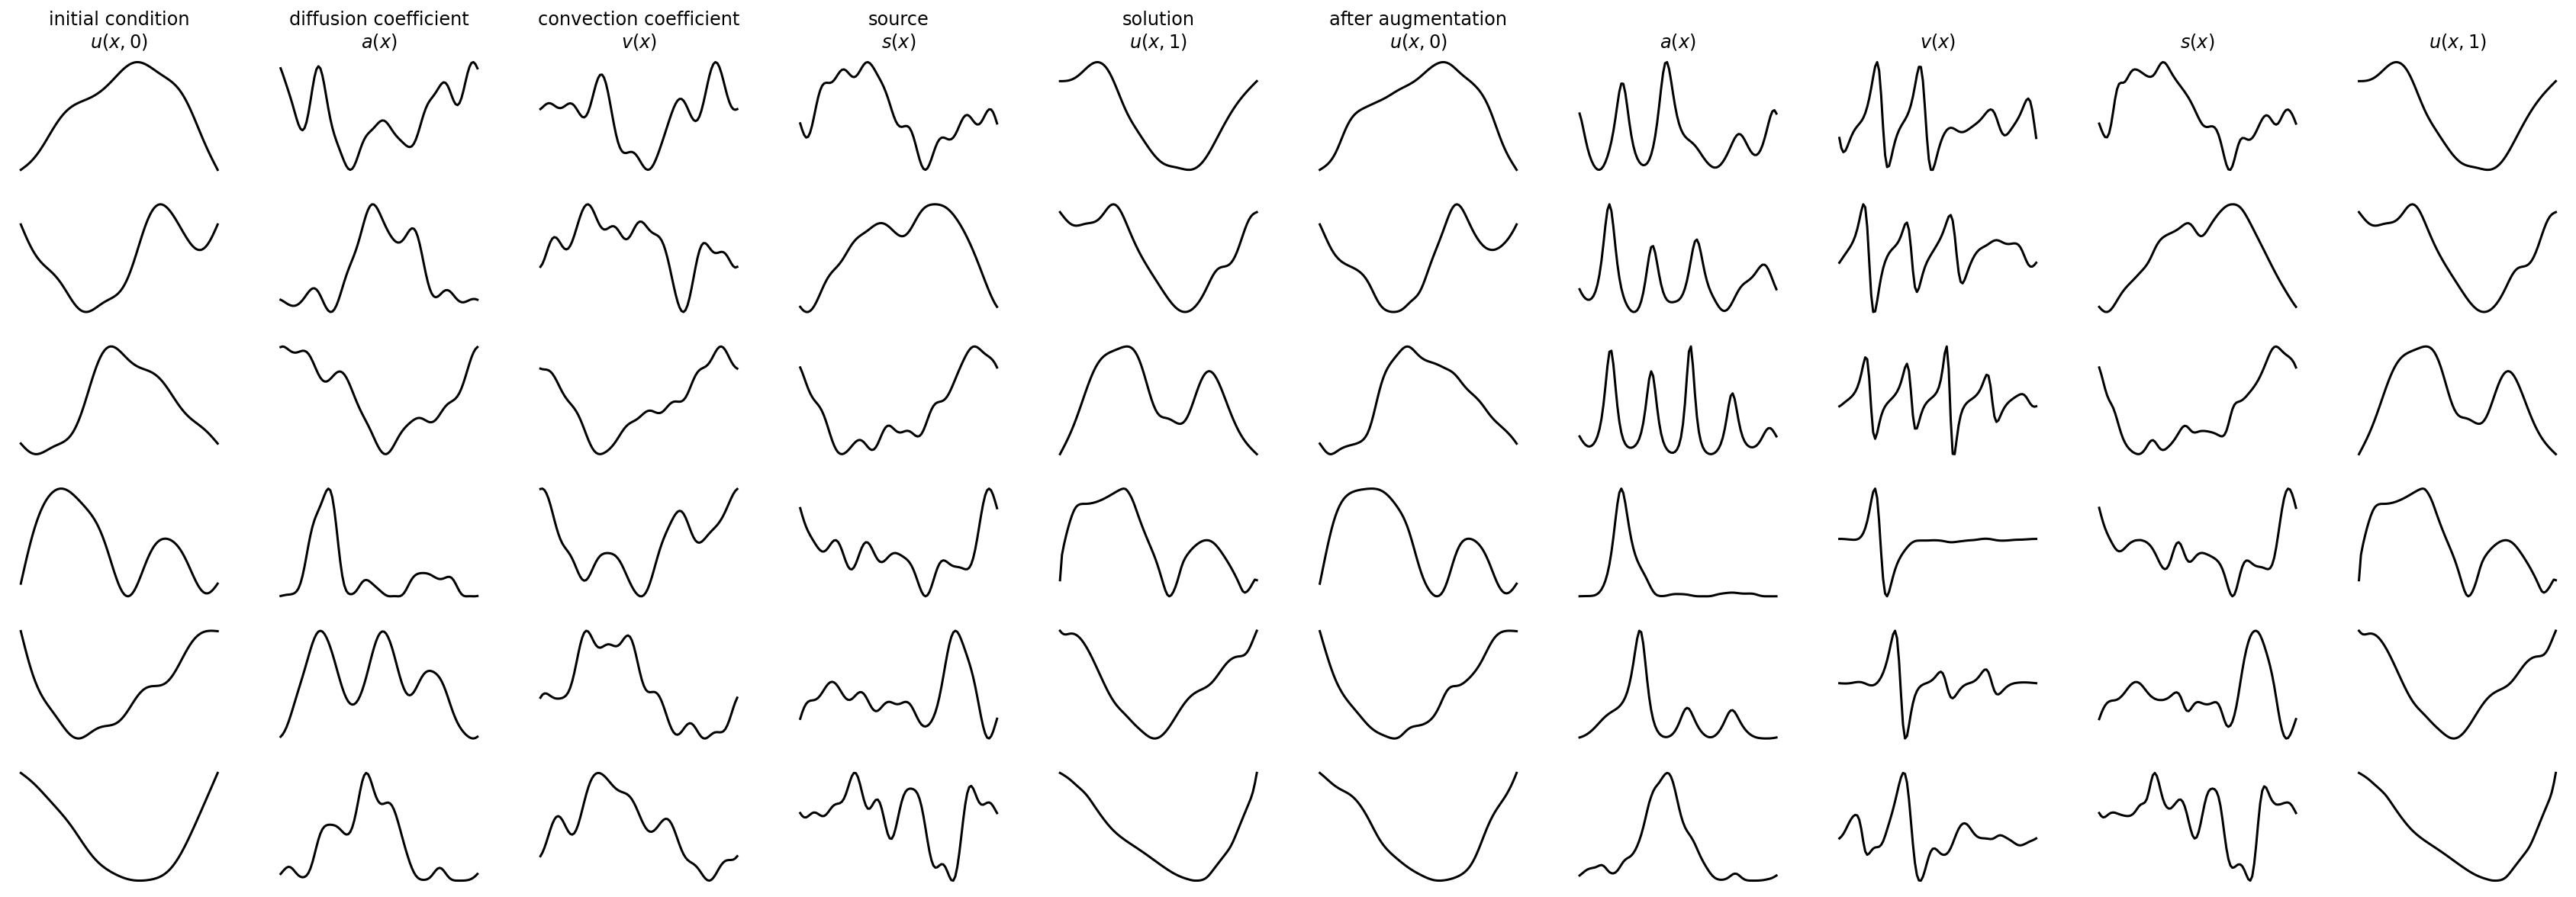

In [12]:
fig, ax = plt.subplots(6, 10, figsize=(30, 10))

x = jnp.linspace(0, 1, 100)

sample = 13
for i in range(6):
    ax[i, 0].plot(x, features_[sample + i, 0], color="black")
    ax[i, 1].plot(x, features_[sample + i, 1], color="black")
    ax[i, 2].plot(x, features_[sample + i, 2], color="black")
    ax[i, 3].plot(x, features_[sample + i, 3], color="black")
    ax[i, 4].plot(x, targets_[sample + i, 0], color="black")


    ax[i, 5].plot(x, features_[3000 + sample + i, 0], color="black")
    ax[i, 6].plot(x, features_[3000 + sample + i, 1], color="black")
    ax[i, 7].plot(x, features_[3000 + sample + i, 2], color="black")
    ax[i, 8].plot(x, features_[3000 + sample + i, 3], color="black")
    ax[i, 9].plot(x, targets_[3000 + sample + i, 0], color="black")

ax[0, 0].set_title("initial condition\n$u(x, 0)$")
ax[0, 1].set_title("diffusion coefficient\n$a(x)$")
ax[0, 2].set_title("convection coefficient\n$v(x)$")
ax[0, 3].set_title("source\n$s(x)$")
ax[0, 4].set_title("solution\n$u(x, 1)$")

ax[0, 5].set_title("after augmentation\n$u(x, 0)$")
ax[0, 6].set_title("$a(x)$")
ax[0, 7].set_title("$v(x)$")
ax[0, 8].set_title("$s(x)$")
ax[0, 9].set_title("$u(x, 1)$")

for a in ax.reshape(-1, ):
    a.axis("off")

# Wave (5)

In [13]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/alGwU5LxtOHN6w'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('wave_data_5.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/wave_data_5.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((3000, 4, 100), (3000, 1, 100))

In [14]:
key = random.PRNGKey(11)
features_, targets_ = D1.augment_dataset(features, targets, key, D1.wave_augment_sample, 1)
features_.shape, targets_.shape

((6000, 4, 100), (6000, 1, 100))

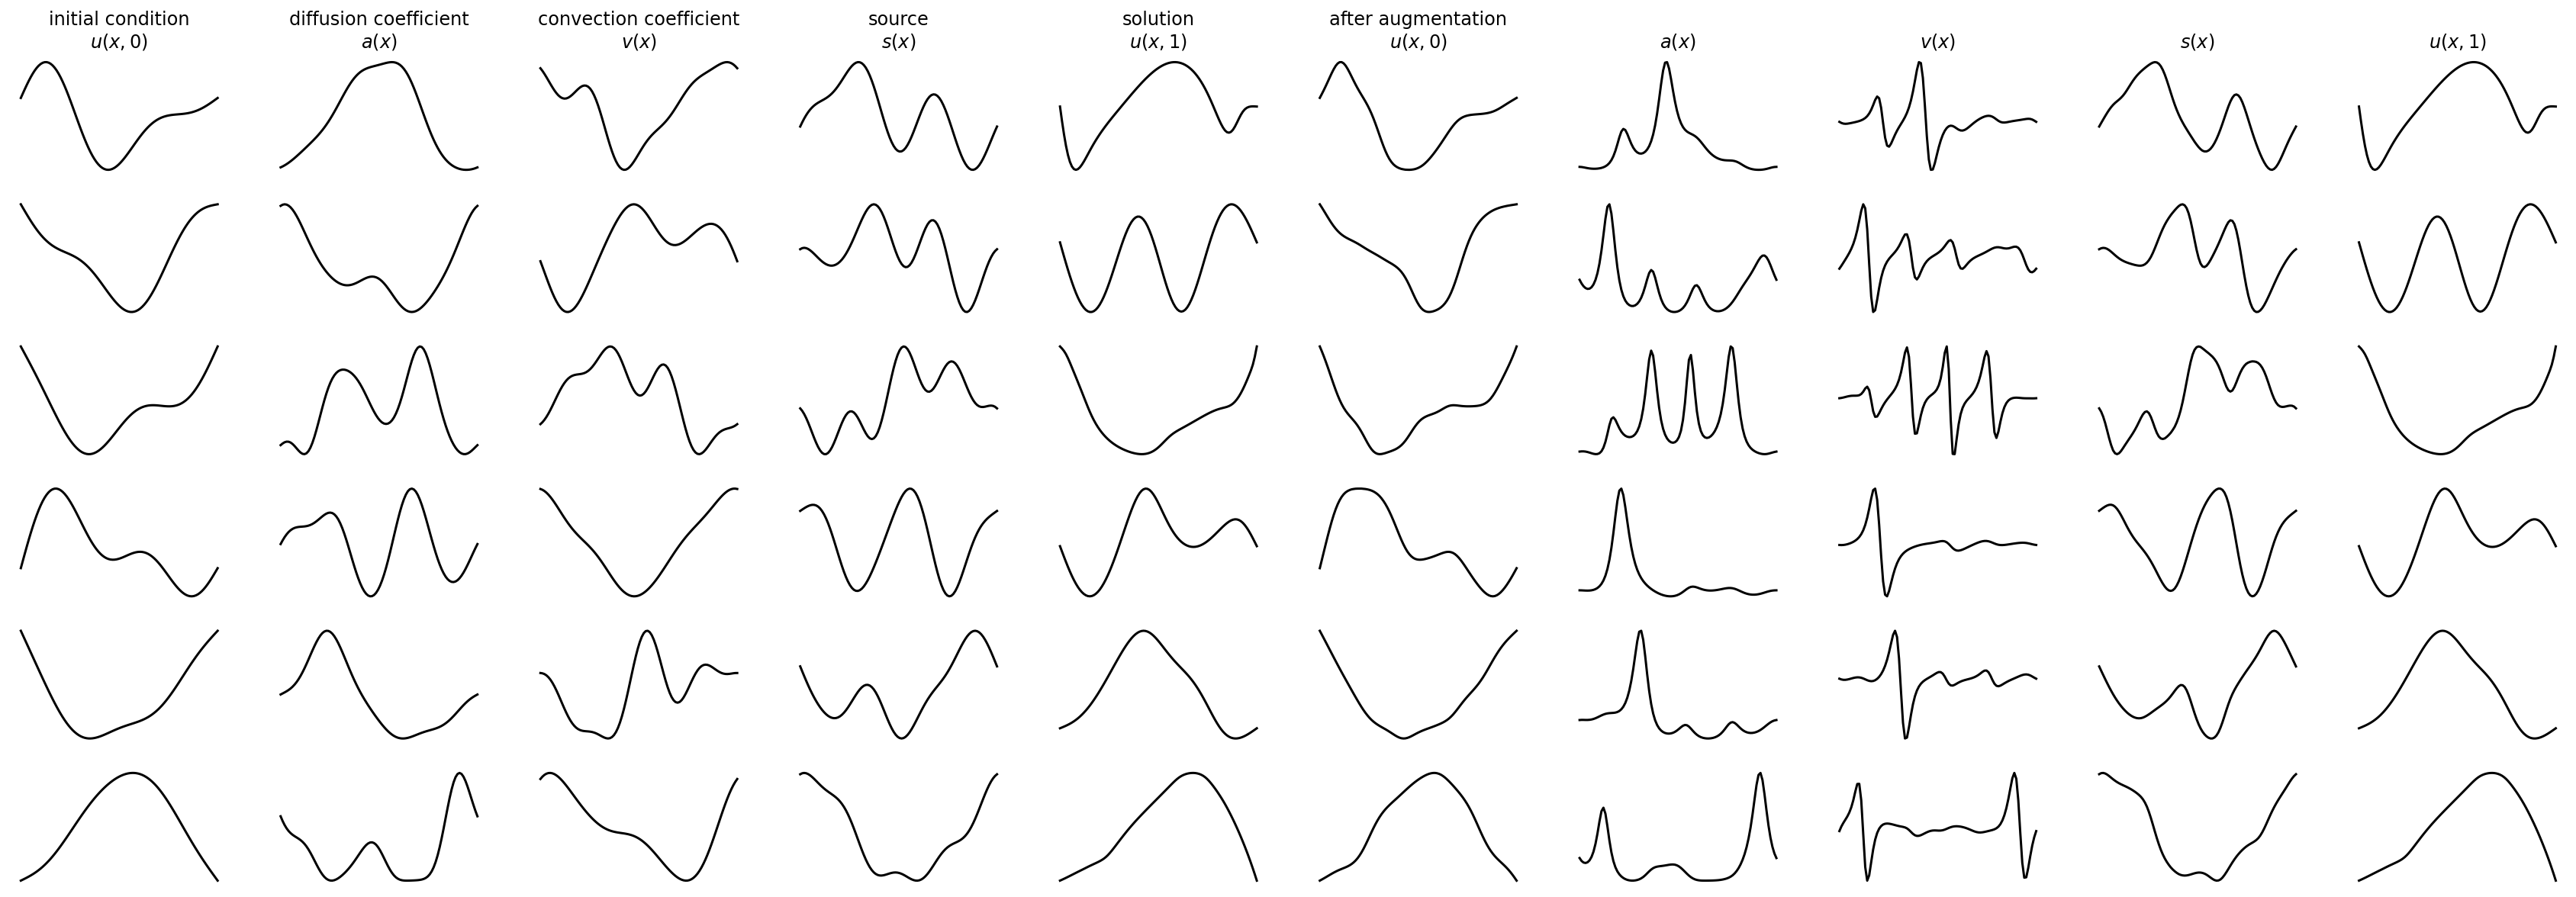

In [15]:
fig, ax = plt.subplots(6, 10, figsize=(30, 10))

x = jnp.linspace(0, 1, 100)

sample = 13
for i in range(6):
    ax[i, 0].plot(x, features_[sample + i, 0], color="black")
    ax[i, 1].plot(x, features_[sample + i, 1], color="black")
    ax[i, 2].plot(x, features_[sample + i, 2], color="black")
    ax[i, 3].plot(x, features_[sample + i, 3], color="black")
    ax[i, 4].plot(x, targets_[sample + i, 0], color="black")


    ax[i, 5].plot(x, features_[3000 + sample + i, 0], color="black")
    ax[i, 6].plot(x, features_[3000 + sample + i, 1], color="black")
    ax[i, 7].plot(x, features_[3000 + sample + i, 2], color="black")
    ax[i, 8].plot(x, features_[3000 + sample + i, 3], color="black")
    ax[i, 9].plot(x, targets_[3000 + sample + i, 0], color="black")

ax[0, 0].set_title("initial condition\n$u(x, 0)$")
ax[0, 1].set_title("diffusion coefficient\n$a(x)$")
ax[0, 2].set_title("convection coefficient\n$v(x)$")
ax[0, 3].set_title("source\n$s(x)$")
ax[0, 4].set_title("solution\n$u(x, 1)$")

ax[0, 5].set_title("after augmentation\n$u(x, 0)$")
ax[0, 6].set_title("$a(x)$")
ax[0, 7].set_title("$v(x)$")
ax[0, 8].set_title("$s(x)$")
ax[0, 9].set_title("$u(x, 1)$")

for a in ax.reshape(-1, ):
    a.axis("off")